# 1) Titolo e obiettivi della lezione

Lezione 19 — Introduzione all'Unsupervised Learning

---

## Mappa della lezione

| Sezione | Contenuto | Tempo stimato |
|---------|-----------|---------------|
| 1 | Titolo, obiettivi, cambio di paradigma | 5 min |
| 2 | Teoria profonda: supervised vs unsupervised, pattern vs verità | 20 min |
| 3 | Schema mentale: flowchart decisionale | 5 min |
| 4 | Demo: K-Means vs classificazione su stessi dati | 20 min |
| 5 | Esercizi risolti + errori comuni | 15 min |
| 6 | Conclusione operativa con bignami | 10 min |
| 7 | Checklist di fine lezione + glossario | 5 min |
| 8 | Changelog didattico | 2 min |

---

## Obiettivi della Lezione

Al termine di questa lezione sarai in grado di:

| # | Obiettivo | Verifica |
|---|-----------|----------|
| 1 | **Distinguere** supervised da unsupervised | Sai cosa manca nell'unsupervised? |
| 2 | **Comprendere** le implicazioni dell'assenza di target | Capisci perché non puoi calcolare accuracy? |
| 3 | **Riconoscere** la differenza tra pattern e verità | Sai che un cluster non è una "classe reale"? |
| 4 | **Evitare** gli errori concettuali più comuni | Conosci i 3 tipi di overfitting unsupervised? |
| 5 | **Orientarti** tra le famiglie di metodi | Sai quando usare clustering vs PCA? |

---

## Il cambio di paradigma fondamentale

```
SUPERVISED:   X ─────► Modello ─────► ŷ ←──── Confronto con y (target)
                                              │
                                              ▼
                                         Errore misurabile

UNSUPERVISED: X ─────► Modello ─────► Pattern ←──── ???
                                              │
                                              ▼
                                         Nessun giudice oggettivo!
```

**Implicazione critica:** Nell'unsupervised learning **non esiste una risposta giusta**. Ogni pattern trovato è un'ipotesi da validare con:
- Conoscenza del dominio
- Stabilità del risultato
- Utilità per il business

---

## Perché questa lezione è importante

Fino ad ora abbiamo sempre lavorato con una variabile target: prevedere un prezzo, classificare un cliente, stimare una probabilità. Questo è il mondo **supervisionato**.

Ma nella realtà aziendale, la maggior parte dei dati **non ha etichette**:
- I log di navigazione di un sito web → Segmentazione utenti
- Le transazioni di un e-commerce → Pattern di acquisto
- I dati di sensori industriali → Anomaly detection
- I comportamenti di utilizzo di un'app → Clustering comportamentale

L'unsupervised learning ci permette di **estrarre struttura** da questi dati anche senza sapere "la risposta giusta". 

> **Attenzione critica:** questa libertà è anche il suo rischio principale. Senza un target che ci dica se abbiamo ragione o torto, è facile trovare pattern che non significano nulla.

---

## Le 3 famiglie dell'Unsupervised Learning

| Famiglia | Obiettivo | Algoritmi tipici | Lezioni |
|----------|-----------|------------------|---------|
| **Clustering** | Raggruppare osservazioni simili | K-Means, DBSCAN, Hierarchical | 20-23 |
| **Riduzione Dimensionale** | Comprimere feature mantenendo informazione | PCA, t-SNE, UMAP | 24-25 |
| **Anomaly Detection** | Identificare outlier/anomalie | Isolation Forest, LOF, One-Class SVM | 26 |

---

## Ruolo nel percorso

| Lezioni 11-18 | Lezioni 19-26 |
|---------------|---------------|
| Supervised Learning | Unsupervised Learning |
| Target noto (y) | Nessun target |
| Valutazione oggettiva (accuracy, RMSE) | Valutazione indiretta e soggettiva |
| Obiettivo: predire | Obiettivo: scoprire struttura |
| Domanda: "Quanto è accurata la predizione?" | Domanda: "Ha senso questa struttura?" |

---

## Prerequisiti

| Concetto | Dove lo trovi | Verifica |
|----------|---------------|----------|
| Train/Test Split | Lezione 10-11 | Sai perché si divide il dataset? |
| Scaling (StandardScaler) | Lezione 13 | Capisci l'impatto su distanze? |
| Metriche classificazione | Lezione 17 | Conosci accuracy, precision, recall? |
| Metriche regressione | Lezione 18 | Conosci RMSE, R²? |

**Micro-checkpoint prerequisiti:**
```python
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
print("Prerequisiti OK!" if hasattr(KMeans(), 'fit_predict') else "Rivedi sklearn")
```

## Sezione 2 - Teoria profonda
Sintesi concettuale dell'apprendimento non supervisionato: differenze con il supervised, implicazioni dell'assenza di target, distinzione pattern vs verita', errori tipici e famiglie di metodi.


---

# Parte 1 — Teoria Concettuale

---

## 1.1 Supervised vs Unsupervised: la differenza fondamentale

### Apprendimento Supervisionato (ripasso)

Nel supervised learning abbiamo sempre:
- **Input X**: le feature che descrivono ogni osservazione
- **Output y**: la variabile target che vogliamo predire

Il modello "impara" la relazione $f$ tale che $y \approx f(X)$ minimizzando un errore misurabile.

**Esempio:** Prevedere il prezzo di una casa ($y$) dalle sue caratteristiche ($X$: metri quadri, zona, stanze...).

La presenza del target ci dà:
- Un **obiettivo chiaro**: minimizzare l'errore tra predizione e realtà
- Una **metrica oggettiva**: possiamo calcolare RMSE, accuracy, F1 e sapere se miglioriamo
- Un **criterio di stop**: quando l'errore è accettabile, ci fermiamo

---

### Apprendimento Non Supervisionato

Nell'unsupervised learning abbiamo **solo X**. Non esiste $y$.

$$\text{Dati} = \{x_1, x_2, ..., x_n\} \quad \text{(nessun target)}$$

L'obiettivo non è predire qualcosa di noto, ma **scoprire struttura nascosta**:
- Gruppi naturali (clustering)
- Relazioni tra variabili (riduzione dimensionale)
- Osservazioni anomale (anomaly detection)
- Pattern di co-occorrenza (association rules)

**Esempio:** Dato l'elenco delle transazioni di un e-commerce, trovare gruppi di clienti con comportamenti simili. Nessuno ci ha detto quanti gruppi esistono o quali sono.

---

### Tabella comparativa

| Aspetto | Supervised | Unsupervised |
|---------|------------|--------------|
| **Dati** | X e y | Solo X |
| **Obiettivo** | Predire y | Scoprire struttura |
| **Valutazione** | Errore su y (oggettiva) | Metriche interne + interpretazione (soggettiva) |
| **Domanda** | "Quanto è accurata la predizionec" | "Ha senso questa strutturac" |
| **Rischio principale** | Overfitting sul target | Trovare pattern senza significato |
| **Esempi** | Regressione, Classificazione | Clustering, PCA, Anomaly Detection |

---

## 1.2 L'assenza del target: cosa implica davvero

Quando non abbiamo un target, perdiamo qualcosa di fondamentale: **la possibilità di sapere se abbiamo ragione**.

### Nel supervised learning

```
Modello predice: y_pred = 150.000€
Valore reale:    y_true = 145.000€
Errore:          5.000€ → posso migliorare
```

Posso calcolare l'errore, confrontare modelli, scegliere il migliore.

### Nell'unsupervised learning

```
Algoritmo trova: 3 cluster
Domanda:         Sono giustic Dovevano essere 4c O 2c
Risposta:        Non lo sappiamo. Non c'è "verità".
```

Non esiste un $y$ con cui confrontarsi. L'algoritmo trova **una struttura possibile**, non **la struttura vera**.

---

### Le conseguenze pratiche

1. **Non possiamo usare accuracy, RMSE, F1** — queste metriche richiedono un target

2. **Dobbiamo usare metriche "interne"** — che valutano la coerenza della struttura trovata (es. Silhouette per il clustering), ma non la sua "verità"

3. **Servono validazioni esterne** — esperti di dominio, buon senso, utilità business

4. **I risultati sono ipotesi, non fatti** — un cluster non è una "classe vera", è un raggruppamento che l'algoritmo ha trovato conveniente

---

### Esempio concreto

Immagina di clusterizzare i clienti di un negozio e trovare 4 gruppi:
- Cluster 0: acquisti frequenti, scontrino basso
- Cluster 1: acquisti rari, scontrino alto
- Cluster 2: nuovi clienti
- Cluster 3: clienti dormienti

**Domanda:** Questi 4 gruppi "esistono davvero"c

**Risposta onesta:** Non lo sappiamo. L'algoritmo ha trovato 4 regioni nello spazio delle feature. Se sono utili per il marketing, li usiamo. Ma non sono "la verità" — sono un'interpretazione.

---

## 1.3 Pattern vs Verità: la distinzione critica

Questo è forse il concetto più importante di tutta la lezione.

### Cosa trova un algoritmo unsupervisedc

Un algoritmo unsupervised trova **pattern statistici** nei dati:
- Punti vicini nello spazio delle feature → cluster
- Direzioni di massima varianza → componenti principali
- Punti isolati → anomalie

Questi pattern sono **matematicamente veri**: l'algoritmo li ha calcolati correttamente.

Ma essere matematicamente vero **non significa essere significativo**.

---

### L'illusione del pattern

Considera questo esperimento mentale:

1. Genero 1000 punti **completamente casuali** in 2 dimensioni
2. Applico K-Means con K=3
3. L'algoritmo trova **sempre** 3 cluster

Quei 3 cluster esistonoc Matematicamente sì: l'algoritmo ha diviso lo spazio in 3 regioni.
Hanno significatoc **No**: i dati erano casuali, non c'era struttura da trovare.

---

### La regola d'oro

> **Un pattern trovato da un algoritmo è un'ipotesi, non una scoperta.**

Prima di concludere che "esistono 3 tipi di clienti" o che "questa variabile è anomala", devi:

1. **Verificare la stabilità**: se cambio random seed o parametri, il pattern restac
2. **Verificare l'interpretabilità**: il pattern ha senso nel dominioc
3. **Verificare l'utilità**: il pattern è azionabilec Serve a qualcosac

Se la risposta a tutte e tre è sì, il pattern è **probabilmente** significativo.
Se la risposta a una è no, il pattern potrebbe essere **rumore travestito da struttura**.

---

### Tabella riassuntiva

| Concetto | Pattern | Verità |
|----------|---------|--------|
| **Definizione** | Regolarità statistica nei dati | Struttura reale nel fenomeno |
| **Chi lo trova** | L'algoritmo | Il dominio/la realtà |
| **Sempre presentec** | Sì (anche nei dati casuali) | No (solo se esiste) |
| **Verifica** | Metriche interne | Esperti, test, business |
| **Rischio** | Sovra-interpretazione | Nessuno (è la realtà) |

---

## 1.4 Errori concettuali tipici

Prima di passare agli algoritmi specifici, è fondamentale conoscere gli errori che anche professionisti esperti commettono.

---

### Errore 1: Trattare i cluster come classi vere

**L'errore:** "L'algoritmo ha trovato 4 cluster, quindi esistono 4 tipi di clienti"

**Il problema:** L'algoritmo divide sempre lo spazio. Se gli chiedi 4 gruppi, ne trova 4. Se gli chiedi 10, ne trova 10. Questo non prova che quei gruppi "esistano".

**Come evitarlo:** Valida con il dominio. I cluster hanno sensoc Sono stabilic Sono azionabilic

---

### Errore 2: Usare metriche supervisionate

**L'errore:** Calcolare accuracy o F1 su un risultato di clustering

**Il problema:** Accuracy richiede etichette vere. Se le avessimo, non saremmo in unsupervised.

**Come evitarlo:** Usa metriche appropriate: Silhouette, Davies-Bouldin, errore di ricostruzione.

---

### Errore 3: Non scalare le feature

**L'errore:** Applicare K-Means su dati con scale diverse (es. età 0-100, reddito 0-100.000)

**Il problema:** Le distanze saranno dominate dalla variabile con scala maggiore. L'algoritmo vedrà solo il reddito.

**Come evitarlo:** StandardScaler o MinMaxScaler prima di qualsiasi algoritmo basato su distanze.

---

### Errore 4: Scegliere K "a sentimento"

**L'errore:** "Facciamo 5 cluster perché mi sembra un buon numero"

**Il problema:** Nessuna base razionale. Potrebbe essere 3, potrebbe essere 8.

**Come evitarlo:** Usa metodi sistematici (Elbow, Silhouette) e confronta più valori.

---

### Errore 5: Confondere riduzione dimensionale con selezione feature

**L'errore:** "Ho fatto PCA, quindi ho le feature più importanti"

**Il problema:** PCA crea **combinazioni lineari** delle feature originali. La prima componente principale non è "la feature migliore" — è un mix di tutte.

**Come evitarlo:** Distingui: selezione = scegli feature originali, riduzione = crei nuove dimensioni.

---

### Errore 6: Validare con etichette nascoste

**L'errore:** Avere etichette nel dataset, fingere di non vederle, clusterizzare, poi calcolare accuracy sulle etichette "nascoste"

**Il problema:** Questo è un benchmark controllato, non un vero problema unsupervised. Le etichette influenzano implicitamente le scelte.

**Come evitarlo:** Se usi etichette per validare, dichiaralo esplicitamente come esperimento controllato.

---

### Tabella riassuntiva degli errori

| Errore | Conseguenza | Soluzione |
|--------|-------------|-----------|
| Cluster = classi vere | Conclusioni infondate | Validazione dominio |
| Metriche supervisionate | Numeri senza senso | Metriche interne |
| No scaling | Risultati distorti | Preprocessing |
| K a caso | Struttura arbitraria | Metodi sistematici |
| PCA = selezione | Confusione interpretativa | Capire la differenza |
| Etichette nascoste | Falsa sicurezza | Dichiarare il setup |

---

## 1.5 Le famiglie di metodi unsupervised

Prima di entrare nel dettaglio di ciascun algoritmo (lezioni successive), è utile avere una mappa delle principali famiglie.

---

### Famiglia 1: Clustering

**Obiettivo:** Raggruppare osservazioni simili tra loro.

**Domanda tipica:** "Quanti tipi di clienti hoc Come sono fattic"

**Algoritmi principali:**
- **K-Means**: assume cluster sferici, numero K fisso
- **Clustering Gerarchico**: costruisce una gerarchia di gruppi (dendrogramma)
- **DBSCAN**: trova cluster di densità arbitraria, identifica outlier

**Metrica tipica:** Silhouette score, Davies-Bouldin index

---

### Famiglia 2: Riduzione Dimensionale

**Obiettivo:** Comprimere i dati in meno dimensioni preservando l'informazione.

**Domanda tipica:** "Ho 100 feature, posso ridurle a 10 senza perdere troppoc"

**Algoritmi principali:**
- **PCA (Principal Component Analysis)**: lineare, preserva varianza
- **t-SNE, UMAP**: non lineari, ottimi per visualizzazione 2D/3D

**Metrica tipica:** Varianza spiegata, errore di ricostruzione

---

### Famiglia 3: Anomaly Detection

**Obiettivo:** Identificare osservazioni rare o anomale.

**Domanda tipica:** "Quali transazioni sono sospettec Quali sensori hanno valori stranic"

**Algoritmi principali:**
- **Isolation Forest**: isola punti anomali con pochi split
- **One-Class SVM**: definisce un confine attorno ai dati "normali"
- **LOF (Local Outlier Factor)**: confronta densità locale

**Metrica tipica:** Score di anomalia, percentuale di outlier

---

### Famiglia 4: Association Rules (cenni)

**Obiettivo:** Trovare regole di co-occorrenza.

**Domanda tipica:** "Chi compra pane, compra anche lattec"

**Algoritmi principali:**
- **Apriori, FP-Growth**

**Metrica tipica:** Support, confidence, lift

*Non approfondiremo questa famiglia nel corso, ma è utile sapere che esiste.*

---

### Mappa visiva

```
UNSUPERVISED LEARNING
├── Clustering
│   ├── K-Means (Lezione 20)
│   ├── Gerarchico (Lezione 22)
│   └── DBSCAN (Lezione 23)
├── Riduzione Dimensionale
│   └── PCA (Lezioni 24-25)
├── Anomaly Detection
│   └── Isolation Forest (Lezione 26)
└── Feature Engineering Unsupervised (Lezione 27)
```

## Sezione 3 - Schema mentale e decision map
Quando usare o evitare l'unsupervised, segnali nei dati e flow decisionale.


---

# Parte 2 — Schema Mentale e Mappa Logica

---

## 2.1 Quando usare l'unsupervised learning

### Situazioni in cui l'unsupervised è appropriato

| Situazione | Esempio | Metodo suggerito |
|------------|---------|------------------|
| **Nessun target disponibile** | Log di navigazione senza conversioni etichettate | Clustering, Anomaly Detection |
| **Esplorare dati nuovi** | Dataset appena acquisito, nessuna ipotesi | Clustering + PCA per visualizzare |
| **Segmentare senza bias** | Dividere clienti senza categorie predefinite | Clustering |
| **Ridurre complessità** | 500 feature → 50 componenti | PCA |
| **Trovare anomalie** | Frodi, guasti, errori di sistema | Isolation Forest |
| **Preprocessing per supervised** | Creare feature clustering prima di classificare | Clustering come feature engineering |

---

## 2.2 Quando NON usare l'unsupervised learning

### Situazioni in cui l'unsupervised è sbagliato

| Situazione | Perché è sbagliato | Cosa fare invece |
|------------|-------------------|------------------|
| **Hai un target chiaro** | Spreca informazione, risultati peggiori | Usa supervised |
| **Devi fare predizioni precise** | Unsupervised non predice | Usa regressione/classificazione |
| **Servono metriche oggettive** | Unsupervised ha solo metriche interne | Definisci un target o proxy |
| **I cluster devono essere "giusti"** | Non esiste "giusto" senza etichette | Definisci criteri business |

---

## 2.3 Segnali pratici nei dati

Come capire se i dati si prestano a un'analisi unsupervisedc

### Segnali positivi

- **Alta dimensionalità**: molte feature → PCA può aiutare
- **Nessuna variabile target naturale**: non c'è una "risposta" da predire
- **Obiettivo esplorativo**: vuoi capire, non predire
- **Dati eterogenei**: mix di comportamenti diversi → clustering
- **Punti isolati visibili**: scatter plot mostra separazione → clustering possibile

### Segnali negativi

- **Dati uniformi**: tutto simile, nessun gruppo naturale
- **Forte rumore**: struttura nascosta dal rumore
- **Poche osservazioni**: clustering instabile con pochi dati
- **Feature irrilevanti dominanti**: clustering guidato da rumore

---

## 2.4 Flowchart decisionale

```
Ho un target yc
├── SÌ → Supervised Learning (Regressione/Classificazione)
└── NO → Qual è l'obiettivoc
    ├── Raggruppare → Clustering
    │   ├── Cluster sferici, K noto → K-Means
    │   ├── Forma arbitraria, outlier → DBSCAN
    │   └── Gerarchia di gruppi → Hierarchical
    ├── Ridurre dimensioni → PCA / UMAP
    ├── Trovare anomalie → Isolation Forest
    └── Pattern di co-occorrenza → Association Rules
```

## Sezione 4 - Notebook dimostrativo
Dimostrazioni pratiche con dati sintetici per confrontare supervised vs unsupervised, mostrare falsi pattern e l'effetto dello scaling.


### Perche' questo passo (Demo 1)
Mostriamo lo stesso dataset trattato in modalita' supervised e unsupervised per chiarire cosa cambia: presenza del target, metriche disponibili e interpretazione. Checkpoint su forme e range delle metriche evitano conclusioni errate.


[Checkpoint] Dati generati con shape (300, 2)


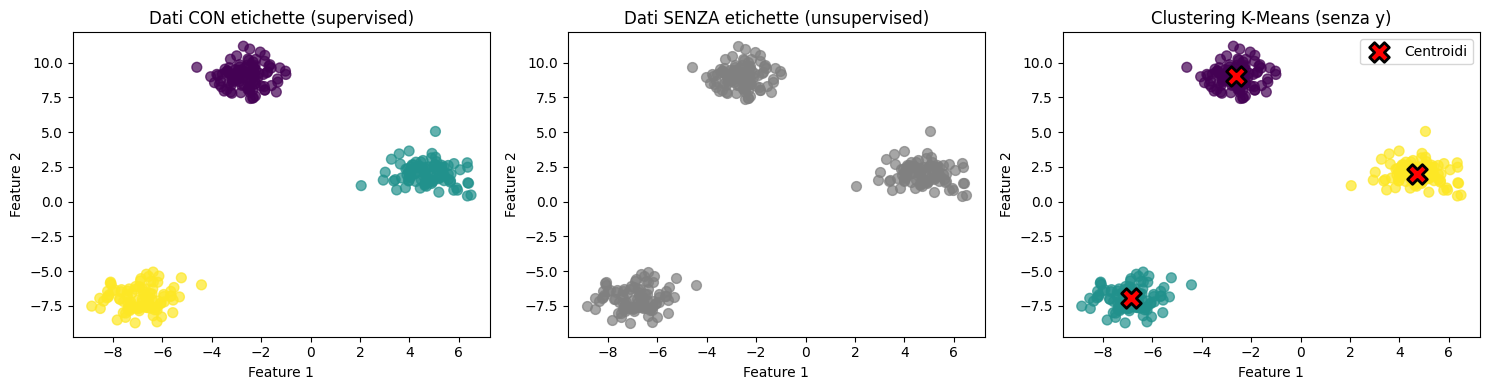

CONFRONTO METRICHE
[SUPERVISED] Accuracy sul test set: 1.000 (ha senso perche' abbiamo y)
[UNSUPERVISED] Silhouette score: 0.878 (coerenza interna, non verita')
LEZIONE: nel supervised esiste un giudice (y). Nell'unsupervised no: trovi struttura, non la verita'.


In [18]:
# ============================================
# DEMO 1: Supervised vs Unsupervised
# Intento: mostrare differenza tra approcci con lo stesso dataset
# Assunzioni: 3 cluster separabili, nessun valore mancante
# Output: grafici comparativi, accuracy (solo per didattica), silhouette
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Step 1: generazione dati con target noto (solo per confronto)
np.random.seed(42)
X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=0.8,
    random_state=42
)
assert X.shape == (300, 2), 'Shape inattesa per X'
assert y_true.shape == (300,), 'Shape inattesa per y_true'
assert not np.isnan(X).any(), 'Sono presenti NaN in X'
print('[Checkpoint] Dati generati con shape', X.shape)

# Step 2: confronto visivo supervised vs unsupervised
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
axes[0].set_title('Dati CON etichette (supervised)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

axes[1].scatter(X[:, 0], X[:, 1], c='gray', s=50, alpha=0.7)
axes[1].set_title('Dati SENZA etichette (unsupervised)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)
axes[2].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
axes[2].scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red', marker='X', s=200, edgecolors='black', linewidth=2,
    label='Centroidi'
)
axes[2].set_title('Clustering K-Means (senza y)')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].legend()
plt.tight_layout()
plt.show()

# Step 3: confronto metriche (solo per scopi didattici)
print('' + '='*60)
print('CONFRONTO METRICHE')
print('='*60)
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)
assert X_train.shape[0] + X_test.shape[0] == 300, 'Split incoerente'

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
assert 0 <= acc <= 1, 'Accuracy fuori range'
print(f"[SUPERVISED] Accuracy sul test set: {acc:.3f} (ha senso perche' abbiamo y)")

sil = silhouette_score(X, y_kmeans)
assert -1 <= sil <= 1, 'Silhouette fuori range'
print(f"[UNSUPERVISED] Silhouette score: {sil:.3f} (coerenza interna, non verita')")

print('LEZIONE: nel supervised esiste un giudice (y). Nell\'unsupervised no: trovi struttura, non la verita\'.')


### Perche' questo passo (Demo 2)
Evidenziamo l'illusione del pattern: K-Means trova cluster anche su dati casuali. Serve per ricordare che un risultato unsupervised e' un'ipotesi da validare, non una verita'.


[Checkpoint] Dati casuali generati con shape (300, 2)


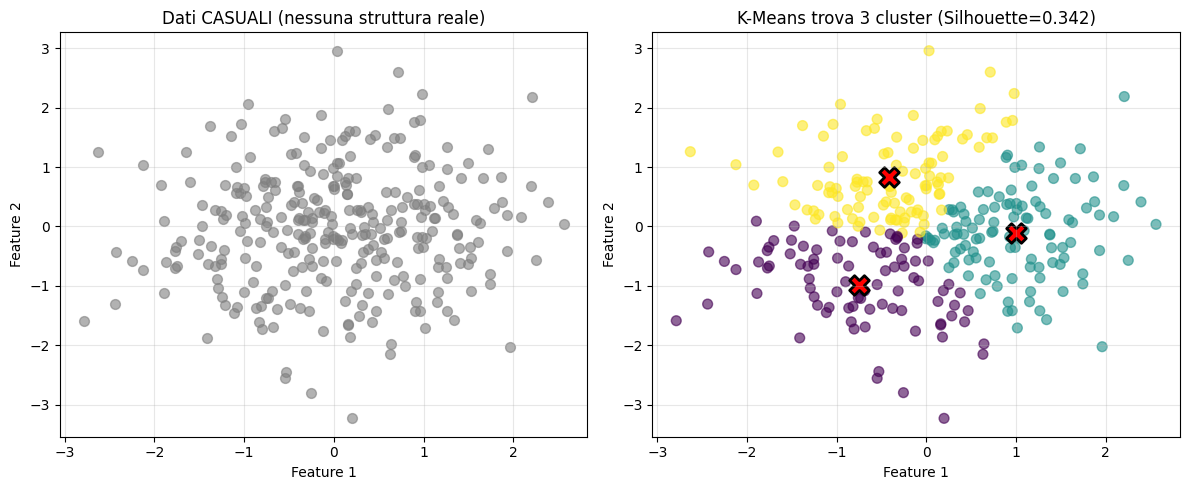


ATTENZIONE CRITICA
Dati completamente casuali, ma K-Means trova comunque 3 cluster.
Silhouette = 0.342 (esiste anche senza struttura reale).
Pattern trovato = ipotesi, non verita: validare con dominio e stabilita


In [19]:
# ============================================
# DEMO 2: L'illusione del pattern
# Intento: mostrare che K-Means trova cluster anche su dati casuali
# Assunzioni: dati gaussiani standard senza struttura
# Output: grafici e silhouette per evidenziare falso pattern
# ============================================

np.random.seed(123)
X_random = np.random.randn(300, 2)
assert X_random.shape == (300, 2), 'Shape inattesa per X_random'
assert not np.isnan(X_random).any(), 'NaN in X_random'
print('[Checkpoint] Dati casuali generati con shape', X_random.shape)

kmeans_random = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_random = kmeans_random.fit_predict(X_random)
sil_random = silhouette_score(X_random, labels_random)
assert -1 <= sil_random <= 1, 'Silhouette fuori range'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X_random[:, 0], X_random[:, 1], c='gray', s=50, alpha=0.6)
axes[0].set_title('Dati CASUALI (nessuna struttura reale)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_random[:, 0], X_random[:, 1], c=labels_random, cmap='viridis', s=50, alpha=0.6)
axes[1].scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1], c='red', marker='X', s=200, edgecolors='black', linewidth=2)
axes[1].set_title(f'K-Means trova 3 cluster (Silhouette={sil_random:.3f})')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print()
print('='*60)
print('ATTENZIONE CRITICA')
print('='*60)
print('Dati completamente casuali, ma K-Means trova comunque 3 cluster.')
print(f'Silhouette = {sil_random:.3f} (esiste anche senza struttura reale).')
print('Pattern trovato = ipotesi, non verita: validare con dominio e stabilita')


### Perche' questo passo (Demo 3)
Mostriamo l'impatto dello scaling su algoritmi basati su distanza (K-Means). Senza scaling la feature a range maggiore domina; con scaling i cluster diventano interpretabili.


[Checkpoint] Dataset clienti creato con shape (200, 2)
Cluster senza scaling: [101  99] | Errori: 1
Cluster con scaling:   [100 100] | Errori: 0


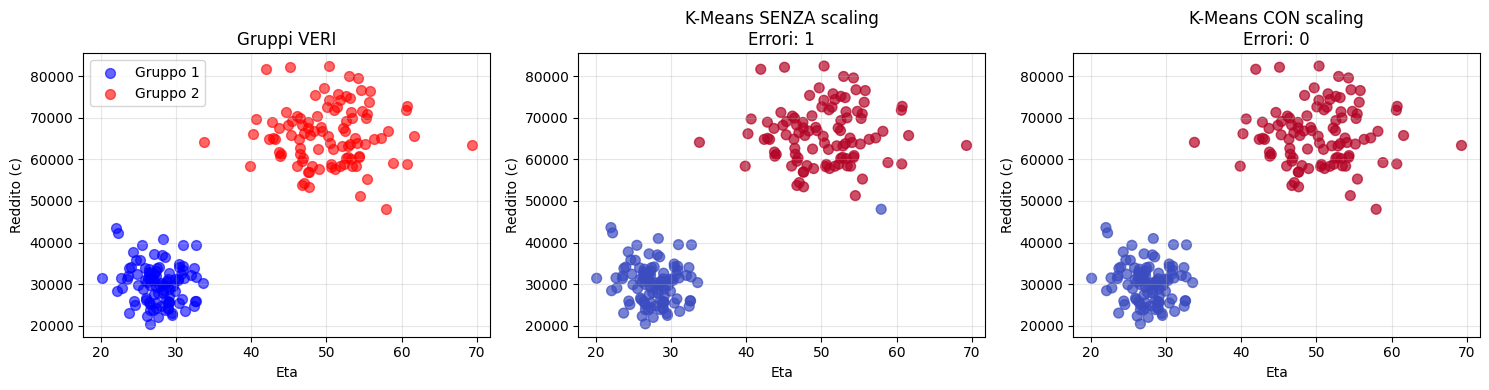

Conclusione: il reddito ha range molto piu' ampio dell'eta; senza scaling domina le distanze. Con scaling, le feature pesano allo stesso modo e gli errori calano.


In [20]:
# ============================================
# DEMO 3: L'importanza dello scaling
# Intento: mostrare come scale diverse distorcono il clustering
# Assunzioni: 2 gruppi separati con range molto diversi tra feature
# Output: grafici e conteggio errori con/without scaling
# ============================================

from sklearn.preprocessing import StandardScaler

np.random.seed(42)
n_per_group = 100

# Gruppo 1: giovani con reddito basso
gruppo1_eta = np.random.normal(28, 3, n_per_group)
gruppo1_reddito = np.random.normal(30000, 5000, n_per_group)

# Gruppo 2: senior con reddito alto
gruppo2_eta = np.random.normal(50, 5, n_per_group)
gruppo2_reddito = np.random.normal(65000, 8000, n_per_group)

X_unscaled = np.vstack([
    np.column_stack([gruppo1_eta, gruppo1_reddito]),
    np.column_stack([gruppo2_eta, gruppo2_reddito])
])
y_vero = np.array([0]*n_per_group + [1]*n_per_group)
assert X_unscaled.shape == (200, 2), 'Shape inattesa per X_unscaled'
print('[Checkpoint] Dataset clienti creato con shape', X_unscaled.shape)

# K-Means senza scaling
kmeans_unscaled = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_unscaled = kmeans_unscaled.fit_predict(X_unscaled)

# K-Means con scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unscaled)
assert X_scaled.shape == X_unscaled.shape, 'Scaling ha cambiato la shape'
kmeans_scaled = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

# Calcolo errori tenendo conto di possibili etichette invertite
def misclass(labels, truth):
    return min((labels != truth).sum(), (labels != (1 - truth)).sum())

errori_unscaled = misclass(labels_unscaled, y_vero)
errori_scaled = misclass(labels_scaled, y_vero)

print(f"Cluster senza scaling: {np.bincount(labels_unscaled)} | Errori: {errori_unscaled}")
print(f"Cluster con scaling:   {np.bincount(labels_scaled)} | Errori: {errori_scaled}")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(X_unscaled[y_vero==0, 0], X_unscaled[y_vero==0, 1], c='blue', s=50, alpha=0.6, label='Gruppo 1')
axes[0].scatter(X_unscaled[y_vero==1, 0], X_unscaled[y_vero==1, 1], c='red', s=50, alpha=0.6, label='Gruppo 2')
axes[0].set_title('Gruppi VERI')
axes[0].set_xlabel('Eta')
axes[0].set_ylabel('Reddito (c)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_unscaled[:, 0], X_unscaled[:, 1], c=labels_unscaled, cmap='coolwarm', s=50, alpha=0.7)
axes[1].set_title(f'K-Means SENZA scaling\nErrori: {errori_unscaled}')
axes[1].set_xlabel('Eta')
axes[1].set_ylabel('Reddito (c)')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(X_unscaled[:, 0], X_unscaled[:, 1], c=labels_scaled, cmap='coolwarm', s=50, alpha=0.7)
axes[2].set_title(f'K-Means CON scaling\nErrori: {errori_scaled}')
axes[2].set_xlabel('Eta')
axes[2].set_ylabel('Reddito (c)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Conclusione: il reddito ha range molto piu' ampio dell'eta; senza scaling domina le distanze. Con scaling, le feature pesano allo stesso modo e gli errori calano.")


## Sezione 5 - Esercizi guidati (step by step)
Esegui in ordine 19.1 -> 19.3: ogni esercizio include razionale, assunzioni e output attesi.


### Perche' questo esercizio (19.1)
Allena al riconoscimento rapido di scenari supervised vs unsupervised prima di toccare il codice.


---

# Parte 4 — Esercizi Svolti

Ogni esercizio è risolto passo per passo con spiegazioni dettagliate.

---

## Esercizio 19.1 — Classificare scenari: Supervised o Unsupervisedc

**Consegna:** Per ciascuno dei seguenti scenari, stabilisci se richiede un approccio supervised o unsupervised. Giustifica la risposta.

### Scenario A
> Un'azienda di telecomunicazioni vuole prevedere quali clienti abbandoneranno il servizio nei prossimi 3 mesi. Ha dati storici con l'indicazione di chi ha effettivamente abbandonato.

### Scenario B
> Un e-commerce vuole segmentare la propria base clienti per personalizzare le campagne marketing. Non ha categorie predefinite.

### Scenario C
> Una banca vuole identificare transazioni fraudolente. Ha pochissimi esempi di frodi confermate (< 0.1% dei dati).

### Scenario D
> Un'azienda vuole ridurre il numero di feature in un dataset con 500 variabili prima di applicare un modello predittivo.

### Scenario E
> Un ospedale vuole prevedere la durata della degenza di un paziente basandosi su dati clinici. Ha dati storici completi.

In [21]:
# ============================================
# ESERCIZIO 19.1 - SOLUZIONE GUIDATA (concettuale)
# Intento: classificare scenari come supervised/unsupervised e motivare
# ============================================

print('='*70)
print('ESERCIZIO 19.1 - SOLUZIONE RAGIONATA')
print('='*70)

soluzioni = {
    'A': {
        'scenario': 'Prevedere churn con dati storici etichettati',
        'risposta': 'SUPERVISED (classificazione)',
        'motivo': 'Target binario disponibile: abbandono si/no. Metriche oggettive possibili.'
    },
    'B': {
        'scenario': 'Segmentare clienti senza categorie predefinite',
        'risposta': 'UNSUPERVISED (clustering)',
        'motivo': 'Nessun target; obiettivo scoprire gruppi naturali.'
    },
    'C': {
        'scenario': 'Individuare frodi con pochissime etichette',
        'risposta': 'PREVALENTEMENTE UNSUPERVISED (anomaly detection)',
        'motivo': 'Classe rara (<0.1%), supervised classico instabile; usare modelli di anomalia.'
    },
    'D': {
        'scenario': 'Ridurre 500 feature a meno dimensioni',
        'risposta': 'UNSUPERVISED (riduzione dimensionale)',
        'motivo': 'Obiettivo comprimere informazione; PCA e simili non usano target.'
    },
    'E': {
        'scenario': 'Prevedere durata degenza con dati storici',
        'risposta': 'SUPERVISED (regressione)',
        'motivo': 'Target continuo disponibile; si valuta con RMSE/MAE.'
    }
}

for lettera, info in soluzioni.items():
    print('-'*70)
    print(f"SCENARIO {lettera}: {info['scenario']}")
    print(f"Approccio: {info['risposta']}")
    print(f"Motivazione: {info['motivo']}")


ESERCIZIO 19.1 - SOLUZIONE RAGIONATA
----------------------------------------------------------------------
SCENARIO A: Prevedere churn con dati storici etichettati
Approccio: SUPERVISED (classificazione)
Motivazione: Target binario disponibile: abbandono si/no. Metriche oggettive possibili.
----------------------------------------------------------------------
SCENARIO B: Segmentare clienti senza categorie predefinite
Approccio: UNSUPERVISED (clustering)
Motivazione: Nessun target; obiettivo scoprire gruppi naturali.
----------------------------------------------------------------------
SCENARIO C: Individuare frodi con pochissime etichette
Approccio: PREVALENTEMENTE UNSUPERVISED (anomaly detection)
Motivazione: Classe rara (<0.1%), supervised classico instabile; usare modelli di anomalia.
----------------------------------------------------------------------
SCENARIO D: Ridurre 500 feature a meno dimensioni
Approccio: UNSUPERVISED (riduzione dimensionale)
Motivazione: Obiettivo compr

### Perche' questo esercizio (19.2)
Allena a diagnosticare errori concettuali frequenti nel clustering e a proporre fix concreti.


---

## Esercizio 19.2 — Identificare errori concettuali

**Consegna:** Leggi il seguente resoconto di un'analisi e identifica TUTTI gli errori concettuali. Spiega perché sono errori e come correggerli.

### Resoconto dell'analista

> "Ho preso i dati dei clienti con 15 feature e ho applicato K-Means con K=5 perché mi sembrava un numero ragionevole. L'algoritmo ha trovato 5 cluster perfetti. 
>
> Ho calcolato l'accuracy del clustering confrontando con le categorie marketing storiche e ho ottenuto 72%. 
>
> Non ho fatto scaling perché le feature erano già tutte in euro. 
>
> Ho concluso che esistono 5 tipi di clienti e ho presentato i risultati al management come verità definitiva."

In [22]:
# ============================================
# ESERCIZIO 19.2 - SOLUZIONE (errori concettuali)
# Intento: individuare errori comuni nel clustering
# ============================================

print('='*70)
print('ESERCIZIO 19.2 - ANALISI DEGLI ERRORI')
print('='*70)

errori = [
    {
        'numero': 1,
        'citazione': 'K=5 perche sembrava un numero ragionevole',
        'errore': 'Scelta arbitraria di K',
        'correzione': 'Usare metodi sistematici (Elbow, Silhouette) e confrontare piu valori.'
    },
    {
        'numero': 2,
        'citazione': 'Calcolata accuracy del clustering',
        'errore': 'Metrica supervisionata su problema unsupervised',
        'correzione': 'Usare metriche interne (Silhouette, Davies-Bouldin) o dichiarare benchmark controllato.'
    },
    {
        'numero': 3,
        'citazione': 'Niente scaling perche tutte le feature in euro',
        'errore': 'Range diversi dominano le distanze',
        'correzione': 'Verificare i range e applicare StandardScaler/MinMaxScaler prima di K-Means.'
    },
    {
        'numero': 4,
        'citazione': '5 cluster perfetti',
        'errore': 'K-Means trova sempre K cluster, anche se non significativi',
        'correzione': 'Valutare qualita con metriche interne e dominio; non parlare di perfezione.'
    },
    {
        'numero': 5,
        'citazione': 'Esistono 5 tipi di clienti (verita definitiva)',
        'errore': 'Scambiare ipotesi per verita',
        'correzione': 'Presentare come interpretazione; testare stabilita e validare con esperti.'
    },
]

for err in errori:
    print('-'*70)
    print(f"ERRORE #{err['numero']}")
    print(f"Citazione: {err['citazione']}")
    print(f"Problema: {err['errore']}")
    print(f"Correzione: {err['correzione']}")

print('Riepilogo: 5 errori -> scegliere K con metodo, metriche corrette, scaling, niente cluster perfetti, ipotesi != verita.')


ESERCIZIO 19.2 - ANALISI DEGLI ERRORI
----------------------------------------------------------------------
ERRORE #1
Citazione: K=5 perche sembrava un numero ragionevole
Problema: Scelta arbitraria di K
Correzione: Usare metodi sistematici (Elbow, Silhouette) e confrontare piu valori.
----------------------------------------------------------------------
ERRORE #2
Citazione: Calcolata accuracy del clustering
Problema: Metrica supervisionata su problema unsupervised
Correzione: Usare metriche interne (Silhouette, Davies-Bouldin) o dichiarare benchmark controllato.
----------------------------------------------------------------------
ERRORE #3
Citazione: Niente scaling perche tutte le feature in euro
Problema: Range diversi dominano le distanze
Correzione: Verificare i range e applicare StandardScaler/MinMaxScaler prima di K-Means.
----------------------------------------------------------------------
ERRORE #4
Citazione: 5 cluster perfetti
Problema: K-Means trova sempre K cluster, an

### Perche' questo esercizio (19.3)
Mostra operativamente l'effetto dello scaling e introduce micro-checkpoint numerici (range, errori) per leggere i risultati.


---

## Esercizio 19.3 — Confrontare clustering con e senza scaling

**Consegna:** 
1. Genera un dataset sintetico con 2 gruppi di clienti caratterizzati da:
   - Età (range ~20-60 anni)
   - Numero di acquisti annui (range ~5-50)
   - Spesa totale annua (range ~500-50.000€)
2. Applica K-Means con K=2 **senza** scaling
3. Applica K-Means con K=2 **con** scaling
4. Confronta i risultati e spiega le differenze

ESERCIZIO 19.3 - CONFRONTO SCALING
Passo 1: Generazione dataset sintetico
[Checkpoint] Dataset creato con shape (300, 3)
Range per feature:
  Eta:      22.1 - 62.3
  Acquisti: 4.2 - 57.3
  Spesa:    3628 - 53794
Passo 2: K-Means SENZA scaling
Passo 3: K-Means CON scaling (StandardScaler)
Media/std dopo scaling: -0.000 / 1.000
Errori senza scaling: 0/300
Errori con scaling:   0/300
Passo 4: Visualizzazione


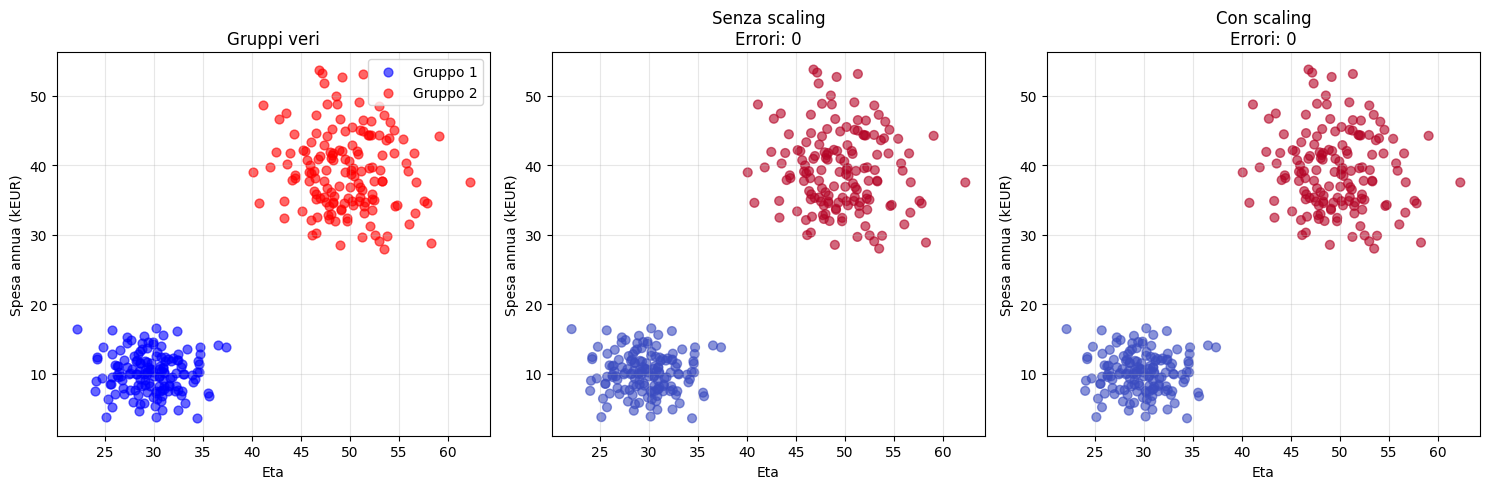

Spiegazione: la spesa ha range molto piu ampio dell eta; senza scaling domina le distanze. Con scaling tutte le feature pesano in modo simile e i cluster risultano corretti.


In [23]:
# ============================================
# ESERCIZIO 19.3 - CONFRONTO SCALING (step-by-step)
# Intento: mostrare l'effetto dello scaling su K-Means con 2 feature
# ============================================

print('='*70)
print('ESERCIZIO 19.3 - CONFRONTO SCALING')
print('='*70)

np.random.seed(42)
n_clienti = 150

print('Passo 1: Generazione dataset sintetico')

gruppo1_eta = np.random.normal(30, 3, n_clienti)
gruppo1_acquisti = np.random.normal(38, 5, n_clienti)
gruppo1_spesa = np.random.normal(10000, 3000, n_clienti)

gruppo2_eta = np.random.normal(50, 4, n_clienti)
gruppo2_acquisti = np.random.normal(15, 4, n_clienti)
gruppo2_spesa = np.random.normal(38000, 6000, n_clienti)

X_clienti = np.vstack([
    np.column_stack([gruppo1_eta, gruppo1_acquisti, gruppo1_spesa]),
    np.column_stack([gruppo2_eta, gruppo2_acquisti, gruppo2_spesa])
])
y_vero = np.array([0]*n_clienti + [1]*n_clienti)
assert X_clienti.shape == (300, 3), 'Shape inattesa per X_clienti'
assert not np.isnan(X_clienti).any(), 'NaN presenti nel dataset sintetico'
print('[Checkpoint] Dataset creato con shape', X_clienti.shape)

print('Range per feature:')
print(f"  Eta:      {X_clienti[:,0].min():.1f} - {X_clienti[:,0].max():.1f}")
print(f"  Acquisti: {X_clienti[:,1].min():.1f} - {X_clienti[:,1].max():.1f}")
print(f"  Spesa:    {X_clienti[:,2].min():.0f} - {X_clienti[:,2].max():.0f}")

print('Passo 2: K-Means SENZA scaling')
kmeans_noscale = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_noscale = kmeans_noscale.fit_predict(X_clienti)

print('Passo 3: K-Means CON scaling (StandardScaler)')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clienti)
assert X_scaled.shape == X_clienti.shape, 'Scaling ha modificato la shape'
print(f'Media/std dopo scaling: {X_scaled.mean():.3f} / {X_scaled.std():.3f}')
kmeans_scaled = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

# Funzione di misclassificazione con etichette invertibili
def misclass(labels, truth):
    return min((labels != truth).sum(), (labels != (1 - truth)).sum())

errori_noscale = misclass(labels_noscale, y_vero)
errori_scaled = misclass(labels_scaled, y_vero)
print(f'Errori senza scaling: {errori_noscale}/{len(y_vero)}')
print(f'Errori con scaling:   {errori_scaled}/{len(y_vero)}')

print('Passo 4: Visualizzazione')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X_clienti[y_vero==0,0], X_clienti[y_vero==0,2]/1000, c='blue', s=40, alpha=0.6, label='Gruppo 1')
axes[0].scatter(X_clienti[y_vero==1,0], X_clienti[y_vero==1,2]/1000, c='red', s=40, alpha=0.6, label='Gruppo 2')
axes[0].set_title('Gruppi veri')
axes[0].set_xlabel('Eta')
axes[0].set_ylabel('Spesa annua (kEUR)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_clienti[:,0], X_clienti[:,2]/1000, c=labels_noscale, cmap='coolwarm', s=40, alpha=0.6)
axes[1].set_title(f'Senza scaling\nErrori: {errori_noscale}')
axes[1].set_xlabel('Eta')
axes[1].set_ylabel('Spesa annua (kEUR)')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(X_clienti[:,0], X_clienti[:,2]/1000, c=labels_scaled, cmap='coolwarm', s=40, alpha=0.6)
axes[2].set_title(f'Con scaling\nErrori: {errori_scaled}')
axes[2].set_xlabel('Eta')
axes[2].set_ylabel('Spesa annua (kEUR)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('Spiegazione: la spesa ha range molto piu ampio dell eta; senza scaling domina le distanze. Con scaling tutte le feature pesano in modo simile e i cluster risultano corretti.')


## Sezione 6 - Conclusione operativa
Punti chiave, metodi usati, errori ricorrenti e Bignami operativo.


---

# Parte 5 — Conclusione Operativa

---

## Cosa portarsi a casa

### I 5 punti fondamentali di questa lezione

1. **Supervised ≠ Unsupervised**
   - Supervised: hai un target, puoi misurare l'errore oggettivamente
   - Unsupervised: nessun target, puoi solo valutare la coerenza interna

2. **Pattern ≠ Verità**
   - Un algoritmo trova sempre struttura (è il suo lavoro)
   - Trovare un pattern non prova che sia significativo
   - Validare sempre con dominio, stabilità, utilità

3. **Scaling è obbligatorio**
   - Prima di K-Means, DBSCAN, PCA: sempre StandardScaler
   - Feature con range diversi distorcono i risultati

4. **Metriche diverse per problemi diversi**
   - Supervised: accuracy, RMSE, F1
   - Unsupervised: Silhouette, errore di ricostruzione, interpretazione

5. **I cluster sono ipotesi, non scoperte**
   - Presentare come interpretazione, non come fatto
   - Testare stabilità, consultare esperti

---

## Errori da evitare

| Errore | Conseguenza |
|--------|-------------|
| Scegliere K "a sentimento" | Struttura arbitraria |
| Usare accuracy su clustering | Numero senza significato |
| Non scalare le feature | Risultati distorti |
| Interpretare cluster come verità | Conclusioni infondate |
| Saltare la validazione dominio | Pattern spurî accettati |

---

## Ponte verso la prossima lezione

In questa lezione abbiamo costruito il **framework mentale** per l'unsupervised learning:
- Quando usarlo e quando no
- Come ragionare senza un target
- Quali errori evitare

Nella **Lezione 20** entreremo nel dettaglio del primo algoritmo di clustering: **K-Means**.

Vedremo:
- Come funziona geometricamente
- Il ruolo dei centroidi
- Le assunzioni forti del modello
- Quando funziona bene e quando fallisce

### Methods explained
| Metodo/Funzione | Cosa fa | Input (tipo/shape) | Output | Errori comuni | Quando usarlo / evitarlo |
|-----------------|---------|--------------------|--------|---------------|---------------------------|
| `make_blobs` | Genera cluster sintetici | n_samples int, centers int/array | X (n,2+), y (n,) | Shape inattesa se centers errato | Per demo controllate; evita per dati reali |
| `train_test_split` | Suddivide dati in train/test | X array/df, y array/series | X_train, X_test, y_train, y_test | Dimensioni non coerenti | Per valutazioni riproducibili |
| `LogisticRegression.fit/predict` | Classificatore lineare | X 2D, y 1D | y_pred 1D | Convergenza se dati non scalati | Baseline veloce su classificazione |
| `KMeans.fit_predict` | Clustering a K fisso | X 2D numerico | labels 1D | Senza scaling domina la feature piu' ampia | Per cluster sferici, K noto |
| `silhouette_score` | Coesione/separazione cluster | X 2D, labels 1D | float [-1,1] | Valori >1 o < -1 segnalano input sbagliato | Per confrontare configurazioni di clustering |
| `StandardScaler` | Scala feature a media 0, std 1 | X 2D | X_scaled 2D | Shape diversa se input non 2D | Prima di modelli basati su distanza |
| `accuracy_score` | Accuratezza supervisata | y_true, y_pred 1D | float [0,1] | Non usare senza target | Solo in supervised |

### Common errors and quick debug
| Sintomo | Causa probabile | Fix rapido |
|---------|-----------------|------------|
| Silhouette negativa molto bassa | Cluster sovrapposti o K errato | Prova altri K, valuta scaling |
| Accuracy usata su clustering | Assenza di target reale | Usa metriche interne e dichiarazioni di test |
| Cluster sbilanciati senza motivo | Feature non scalate | Applica StandardScaler e ripeti |
| Pattern che cambia a ogni run | Seed non fissato o K inadeguato | Fissa `random_state`, prova diverse inizializzazioni |
| Runtime lungo con K-Means | n_init alto o dati grandi senza scaling | Riduci n_init per prototipo, scala dati |
| Interpretazioni discordanti con il dominio | Pattern non validato | Coinvolgi esperto, verifica utilita' business |


### Bignami operativo

---

## I 5 Take-Home Messages

### 1. Unsupervised = Nessun giudice oggettivo
Non esiste accuracy, non esiste RMSE. Ogni pattern trovato è un'**ipotesi** da validare con:
- Esperto di dominio ("Ha senso questo raggruppamento?")
- Stabilità ("Cambia se rieseguo con seed diverso?")
- Utilità ("Serve a prendere decisioni migliori?")

### 2. Pattern ≠ Verità
```
K-Means trova 3 cluster → NON significa che esistono 3 gruppi reali
PCA trova 2 componenti → NON significa che bastano 2 variabili
Isolation Forest trova anomalie → NON significa che sono frodi
```
**L'algoritmo risponde alla domanda che gli fai**, non alla domanda giusta.

### 3. Scaling è OBBLIGATORIO (quasi sempre)
Gli algoritmi unsupervised lavorano su **distanze**:
- K-Means: distanza dai centroidi
- DBSCAN: densità locale
- PCA: varianza (influenzata dalla scala)

**Senza scaling**, la feature con range più ampio domina tutto.

### 4. Le metriche interne sono guide, non verdetti

| Metrica | Cosa misura | Range | Limite |
|---------|-------------|-------|--------|
| Silhouette | Coesione/separazione | [-1, +1] | Non vede la "verità" |
| Inertia | Compattezza interna | [0, +∞) | Scende sempre con più K |
| Explained Variance (PCA) | Informazione mantenuta | [0%, 100%] | Non dice se è utile |

### 5. I cluster sono segmentazioni proposte
Non trattare i cluster come classi vere:
```python
# SBAGLIATO: "Il cliente 123 appartiene alla classe Premium"
# CORRETTO:  "Il modello suggerisce che il cliente 123 sia simile al gruppo che abbiamo chiamato Premium"
```

---

## Flowchart decisionale: Supervised vs Unsupervised

```
                    HAI UN TARGET (y)?
                          │
              ┌───────────┴───────────┐
              │                       │
             SÌ                      NO
              │                       │
              ▼                       ▼
      SUPERVISED               UNSUPERVISED
              │                       │
    ┌─────────┴─────────┐    ┌────────┴────────┐
    │                   │    │                 │
Regressione      Classificazione  Scoprire    Ridurre
(y continuo)     (y discreto)     gruppi      dimensioni
    │                   │         │           │
    ▼                   ▼         ▼           ▼
RMSE, MAE, R²    Accuracy, F1   Silhouette   Explained
                                Elbow        Variance
```

---

## Template mentale per progetti unsupervised

```python
# 1. Prepara i dati
X_scaled = StandardScaler().fit_transform(X)

# 2. Applica l'algoritmo
model = UnsupervisedAlgorithm(hyperparams)
labels = model.fit_predict(X_scaled)  # o componenti per PCA

# 3. Valuta con metriche INTERNE (mai accuracy!)
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, labels)

# 4. Valida con ESPERTO DI DOMINIO
# "Questi 4 gruppi hanno senso per il business?"

# 5. Testa la STABILITÀ
# Riesegui con seed diversi, verifica che i pattern persistano

# 6. Definisci l'UTILITÀ
# "Cosa faccio di diverso ora che conosco questi gruppi?"
```

---

## Prossimi passi
→ **Lezione 20**: K-Means Clustering - l'algoritmo più usato per segmentazione

## Sezione 7 - End-of-lesson checklist e glossario


### Checklist finale
- [ ] Seed fissato e dati generati senza NaN
- [ ] Demos eseguite con checkpoint (shape, range metriche)
- [ ] Scaling applicato prima di K-Means nelle demo/esercizi
- [ ] Esercizi 19.1-19.3 completati e discussi
- [ ] Silhouette e altri output interpretati con senso critico
- [ ] Pattern presentati come ipotesi e validati con dominio


### Glossario (termini usati in questa lezione)
1. Supervised Learning c apprendimento con target noto.
2. Unsupervised Learning c apprendimento senza target.
3. Clustering c raggruppare osservazioni simili.
4. Riduzione dimensionale c comprimere le feature mantenendo informazione.
5. Anomaly Detection c identificare osservazioni rare.
6. K-Means c algoritmo di clustering basato su centroidi.
7. Silhouette score c metrica di coesione/separazione dei cluster.
8. StandardScaler c scaling a media 0 e deviazione 1.
9. Feature scaling c normalizzare le scale delle variabili.
10. Pattern c struttura statistica individuata dal modello.
11. Verita' c struttura reale del fenomeno (da validare con dominio).
12. Flowchart decisionale c schema di scelta tra supervised e unsupervised.
13. Accuracy c quota di predizioni corrette (solo supervised).
14. Centroidi c punti medi dei cluster in K-Means.
15. Random seed c numero per rendere riproducibile la casualita'.


## Sezione 8 - Didactic changelog

| Versione | Data | Modifiche |
|----------|------|-----------|
| 1.0 | Originale | Versione iniziale del notebook |
| 2.0 | 2026-01-XX | Strutturata la lezione nelle 8 sezioni obbligatorie |
| 2.1 | 2026-01-XX | Aggiunte rationale e checkpoint numerici a demo e esercizi |
| 2.2 | 2026-01-XX | Inserite sezioni Methods explained, Common errors, Glossario |
| 2.3 | 2026-01-XX | Ripulito output da emoji, messaggi ASCII-safe |
| 2.4 | 2026-01-XX | **Espansione didattica completa**: mappa lezione con tempi; diagramma ASCII paradigma supervised vs unsupervised; tabella 3 famiglie unsupervised con lezioni; 5 take-home messages; flowchart decisionale; template mentale 6 step per progetti unsupervised; confronto metriche interne vs accuracy. |

---

## Note di rilascio v2.4

### Contenuti aggiunti
- **Header**: mappa temporale, diagramma paradigma, tabella famiglie con riferimenti lezioni
- **Bignami**: 5 principi operativi, flowchart ASCII, template progetto unsupervised

### Miglioramenti pedagogici
- Distinzione esplicita pattern vs verità con esempi
- Obbligo scaling spiegato in termini di distanze
- Metriche interne presentate come guide, non verdetti
- Linguaggio corretto per cluster ("suggerisce" vs "appartiene")

### Competenze verificabili
Dopo questa lezione lo studente può:
1. Decidere se un problema richiede supervised o unsupervised
2. Evitare l'errore di usare accuracy su clustering
3. Impostare un progetto unsupervised con i 6 step
4. Comunicare correttamente i risultati agli stakeholder

---

**Fine della lezione**